In [1]:
import numpyro
from numpyro.distributions import SineBivariateVonMises
from Model.Energy import SineBivariateVonMisesEnergy
from Model.Proposal import GaussianProposal
from Data import get_dataloader_from_data
import matplotlib.pyplot as plt
import numpy as np
import torch 
from torch.utils.data import TensorDataset, DataLoader
from Model.Trainer import SNLTrainer

/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Target Distribution 

In [2]:
target_distribution = SineBivariateVonMises(phi_loc=0.0, psi_loc=np.pi/2, phi_concentration=2.0, psi_concentration=10.0, correlation=-10.0)

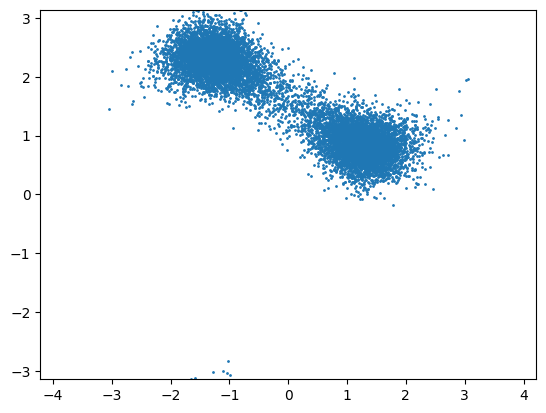

In [3]:
from numpyro import prng_key
from jax import random
rng_key = random.PRNGKey(0)
sample = torch.from_numpy(np.array(target_distribution.sample(key=rng_key, sample_shape=(10000,))))


plt.axis('equal')
# Limit axis to -pi, pi
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
# plt.scatter(sample[:, 0]%2*np.pi - np.pi, sample[:, 1]%2*np.pi - np.pi, s=1)

plt.scatter(sample[:, 0], sample[:, 1], s=1)
plt.show()

data_train = get_dataloader_from_data(torch.from_numpy(sample.numpy()), batch_size=256)


# Proposal Distribution

In [4]:
proposal_distribution = GaussianProposal(input_size=torch.Size([2]), mu=torch.tensor([0.0, np.pi/2]), sigma=torch.tensor([1.0, 1.0]))

Init Standard Gaussian...


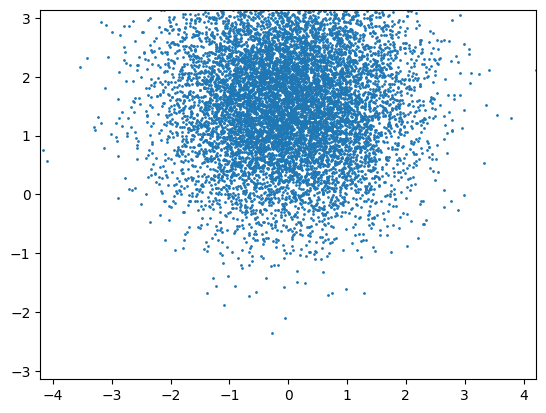

In [5]:
sample = proposal_distribution.sample(10000)

plt.axis('equal')
# Limit axis to -pi, pi
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
# plt.scatter(sample[:, 0]%2*np.pi - np.pi, sample[:, 1]%2*np.pi - np.pi, s=1)

plt.scatter(sample[:, 0], sample[:, 1], s=1)
plt.show()

# Energy 

In [6]:
energy_model = SineBivariateVonMisesEnergy(learn_theta_1=True, learn_theta_2=True, learn_kappa_1=True, learn_kappa_2=True, learn_lambda=True)

# Trainer 

In [7]:
trainer = SNLTrainer(energy_model, proposal_distribution, data_train, data_train, lr=1e-3 )

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hugosenetaire. Use `wandb login --relogin` to force relogin


In [ ]:
trainer.train(n_iter = 200000,n_iter_pretrain= 1000)

Step 0
Step 1000
Step 2000
Step 3000
Step 4000
Step 5000
Step 6000
Step 7000
Step 8000
Step 9000
Step 10000
Step 11000
Step 12000
Step 13000
Step 14000
Step 15000
Step 16000
Step 17000
Step 18000
Step 19000
Step 20000
Step 21000
Step 22000
Step 23000
Step 24000
Step 25000
Step 26000
Step 27000
Step 28000
